In [ ]:
""" 
this ipython notebook created for Complex Network class to demonstarete network analysis with networkx
Created by: Anıl Osman Tur 
Institute: Ankara University Computer Engineering Department
Date: 1.12.2017

@author: anilosmantur

"""

# Setting the enviroment and adding Networkx library

In [1]:
import community
import networkx as nx ## loading networkx library
import matplotlib.pyplot as plt ## loading ploting liabary
import UtilitiesNetwork as un
print('library imports done')

library imports done


 # Graph operations
 ### Graph Drawing

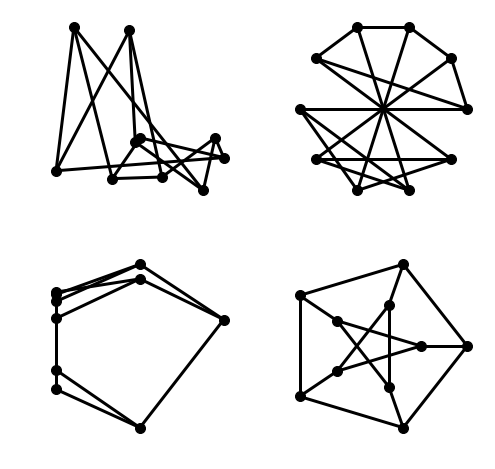

In [3]:
# Drawing Examples
plt.figure(figsize=(8, 8)) # size setting

G = nx.petersen_graph()

options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

plt.subplot(221)
nx.draw_random(G, **options)

plt.subplot(222)
nx.draw_circular(G, **options)

plt.subplot(223)
nx.draw_spectral(G, **options)

plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
plt.show()

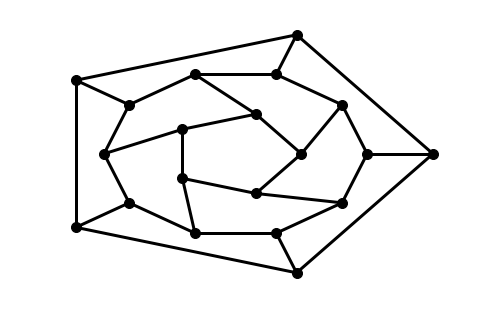

In [4]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)
plt.show()

### Graph generators

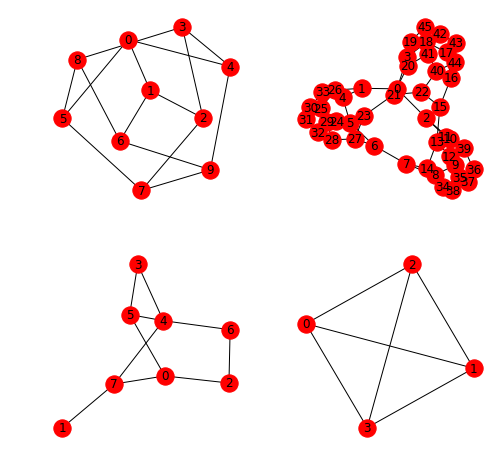

In [2]:
# the classic small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.axis('off')
nx.draw_networkx(petersen)
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(tutte)
plt.subplot(223)
plt.axis('off')
nx.draw_networkx(maze)
plt.subplot(224)
plt.axis('off')
nx.draw_networkx(tet)
plt.show()

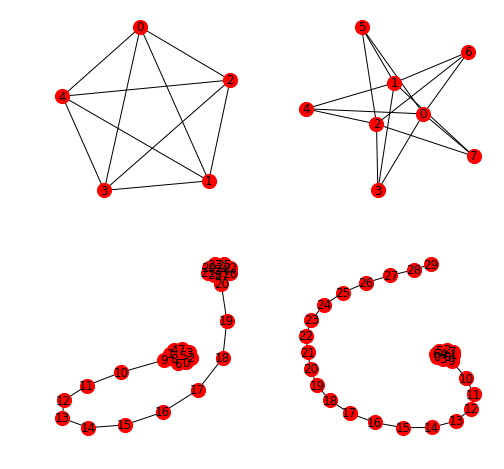

In [6]:
# Using a (constructive) generator for a classic graph
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

plt.figure(figsize=(8, 8))
options = {
    'node_color': 'red',
    'node_size': 200,
    'width': 1,
}
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(K_5, **options)
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(K_3_5, **options)
plt.subplot(223)
plt.axis('off')
nx.draw_networkx(barbell, **options)
plt.subplot(224)
plt.axis('off')
nx.draw_networkx(lollipop, **options)
plt.show()

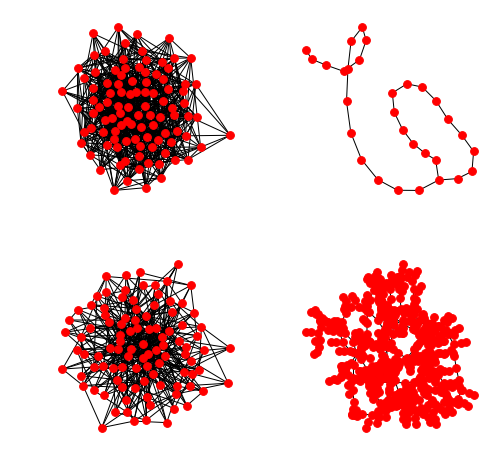

In [7]:
# Using a stochastic graph generator
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

plt.figure(figsize=(8, 8))
options = {
    'node_color': 'red',
    'node_size': 60,
    'width': 1,
}
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(er, with_labels=False, **options)
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(ws, with_labels=False, **options)
plt.subplot(223)
plt.axis('off')
nx.draw_networkx(ba, with_labels=False, **options)
plt.subplot(224)
plt.axis('off')
nx.draw_networkx(red, with_labels=False, **options)
plt.show()

## Analyzing Graphs

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]
[2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 11, 12]


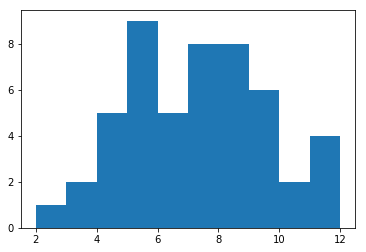

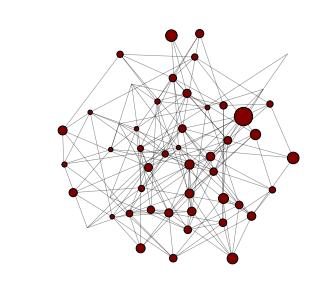

Printing centrality layout finished


In [8]:
## Analyzing Graphs
G = nx.erdos_renyi_graph(50, 0.15)
components = list(nx.connected_components(G))
print (components)
degrees = sorted(d for n, d in G.degree())
print(degrees)
plt.hist(degrees)
plt.show()
clusters = nx.clustering(G)
pos = nx.spring_layout(G)
un.drawCentralityGraph(G, pos, clusters, 5)
sp = dict(nx.all_pairs_shortest_path(G)) 
#print (sp[2])

Connected component:  2


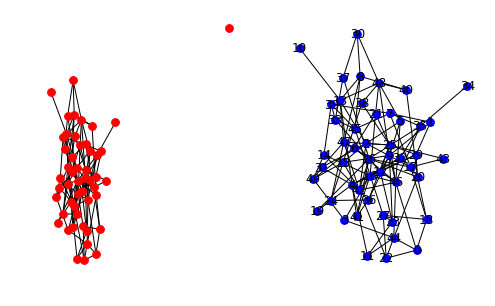

In [3]:
G = nx.erdos_renyi_graph(50, 0.09)
graphs = list(nx.connected_component_subgraphs(G))
print ('Connected component: ', len(graphs))
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels=False, node_color='red', node_size=60, width=1)
plt.subplot(122)
plt.axis('off')
nx.draw_networkx(G, pos, nodelist=graphs[0], node_color='blue', node_size=60)
plt.show()


# Zachary karate club network analaysis with networkx
Zachary karate club network dataset - http://konect.uni-koblenz.de/networks/ucidata-zachary

- W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977).

This is the well-known Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. This is a classical social network dataset from the literature. The network is very small: it has 34 vertices and 78 undirected edges.

### Open the network data  file

In [4]:
# network dataset path
NET_DATA_PATH = '/home/anilosmantur/***/complex_networks/project/karete_net/ucidata-zachary/out.ucidata-zachary'

netFile = open(NET_DATA_PATH)
if netFile:
    print('network data file opened')
line = netFile.readline()
line = netFile.readline()
edges = [] # edge list
for i, line in enumerate(netFile):
    words = line.split()
    edges.append((int(words[0]), int(words[1])))
print('Edge adding finished')
#print('Edges: ', edges)
netFile.close() 

network data file opened
Edge adding finished


### Creating graph object

In [5]:
# create a graph object
karete_net = nx.Graph(edges)
print(nx.info(karete_net))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


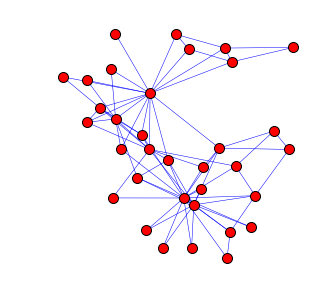

Printing layout finished


In [6]:
pos = nx.spring_layout(karete_net) # positions the graph
un.drawGraph(karete_net, pos, 5, 100)

### All avialable layouts
- 1 'circular_layout',     nodes on a circle.
- 2 'kamada_kawai_layout', Kamada-Kawai path-length cost-function
- 3 'random_layout',       uniformly at random in the unit square.
- 4 'shell_layout',        concentric circles.
- 5 'spring_layout',       Fruchterman-Reingold force-directed algorithm
- 6 'spectral_layout',     eigenvectors of the graph Laplacian.

to layout documentation: 
- https://networkx.github.io/documentation/latest/_modules/networkx/drawing/layout.html

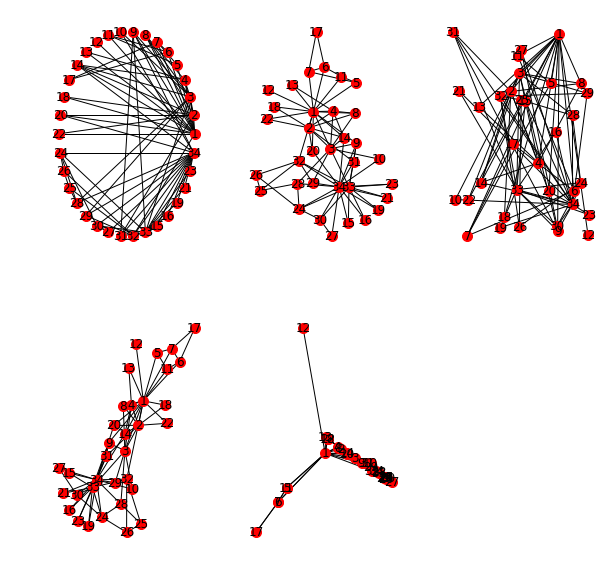

In [7]:
plt.figure(figsize=(10, 10))

pos1 = nx.circular_layout(karete_net)
pos2 = nx.kamada_kawai_layout(karete_net)
pos3 = nx.random_layout(karete_net)
pos4 = nx.spring_layout(karete_net)
pos5 = nx.spectral_layout(karete_net)

options = {
    'node_color': 'red',
    'node_size': 100,
    'width': 1,
}

plt.subplot(231)
plt.axis('off')
nx.draw_networkx(karete_net, pos1, **options)

plt.subplot(232)
plt.axis('off')
nx.draw_networkx(karete_net, pos2, **options)

plt.subplot(233)
plt.axis('off')
nx.draw_networkx(karete_net, pos3, **options)

plt.subplot(234)
plt.axis('off')
nx.draw_networkx(karete_net, pos4, **options)

plt.subplot(235)
plt.axis('off')
nx.draw_networkx(karete_net, pos5, **options)

plt.show()

Found community count:  4.0
Modularity:  0.41978961209730437
Found community count:  4.0


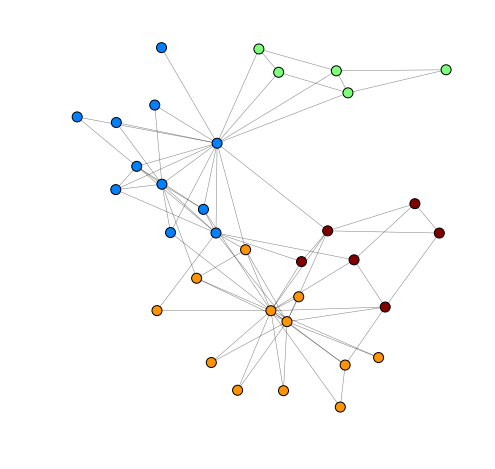

Printing community layout finished


In [8]:
part = community.best_partition(karete_net)
size = float(len(set(part.values())))
print('Found community count: ', size )
mode = community.modularity(part, karete_net)
print('Modularity: ', mode)
un.drawCommunityGraph(karete_net, pos, part, 8, 100)

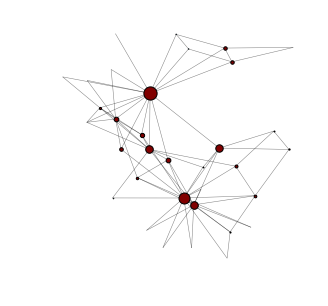

Printing centrality layout finished


In [9]:
centb = nx.centrality.betweenness_centrality(karete_net)
un.drawCentralityGraph(karete_net, pos, centb, 5)

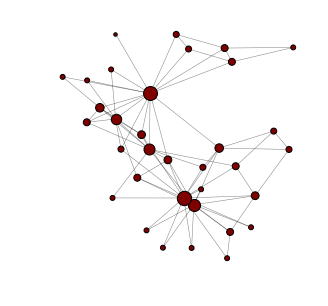

Printing centrality layout finished


In [10]:
centd = nx.centrality.degree_centrality(karete_net)
un.drawCentralityGraph(karete_net, pos, centd, 5)

community count:  2


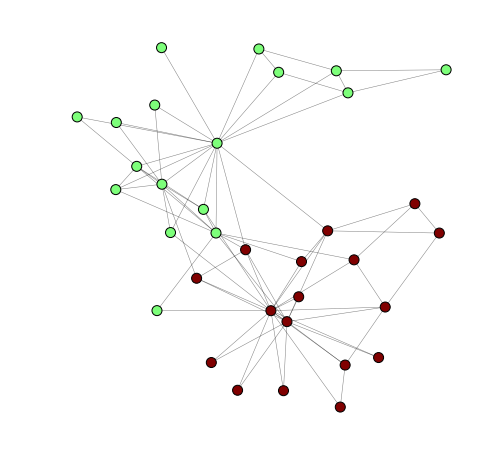

Printing community layout finished


In [11]:
part2 = nx.algorithms.community.kernighan_lin_bisection(karete_net)
coms = list(sorted(c) for c in part2)
un.nxDrawCommunityGraph(karete_net, pos, coms, 8, 100)

In [ ]:
# takes too much time
part2 = nx.algorithms.community.asyn_lpa_communities(karete_net)
coms = list(sorted(c) for c in part2)
un.nxDrawCommunityGraph(karete_net, pos, coms, 8, 100)

community count:  5


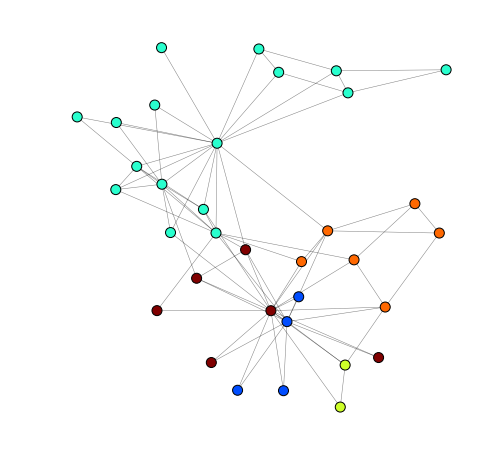

Printing community layout finished


In [13]:
part2 = nx.algorithms.community.asyn_fluidc(karete_net, 5)
coms = list(sorted(c) for c in part2)
un.nxDrawCommunityGraph(karete_net, pos, coms, 8, 100)

community count:  2


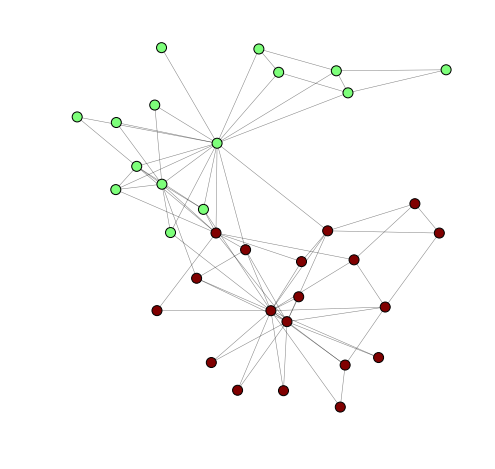

Printing community layout finished


In [14]:
part2 = nx.algorithms.community.girvan_newman(karete_net)
coms = list(sorted(c) for c in next(part2))
un.nxDrawCommunityGraph(karete_net, pos, coms, 8, 100)

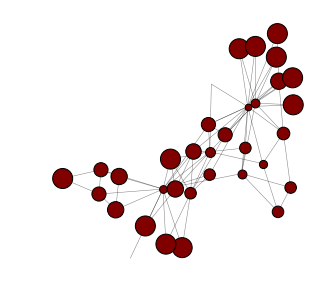

Printing centrality layout finished


In [22]:
clusters = nx.clustering(karete_net)
un.drawCentralityGraph(karete_net, pos, clusters, 5)

/home/anilosmantur/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


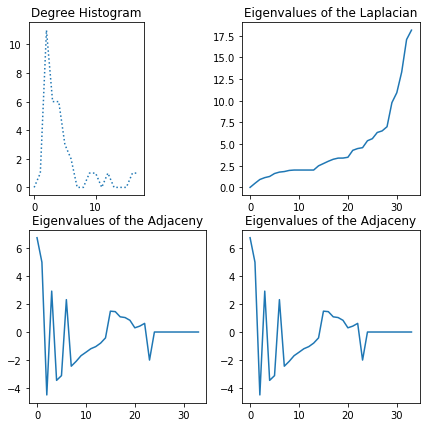

In [23]:
hist = nx.degree_histogram(karete_net)
plt.figure(figsize=(7,7))
plt.subplot(231)
plt.plot(hist, linestyle=':')
plt.title('Degree Histogram')

lap_spec = nx.laplacian_spectrum(karete_net)
plt.subplot(222)
plt.plot(lap_spec)
plt.title('Eigenvalues of the Laplacian')

adj_spec = nx.adjacency_spectrum(karete_net)
plt.subplot(223)
plt.plot(adj_spec)
plt.title('Eigenvalues of the Adjaceny')

adj_spec = nx.adjacency_spectrum(karete_net)
plt.subplot(224)
plt.plot(adj_spec)
plt.title('Eigenvalues of the Adjaceny')
plt.show()